BASED ON GALVANIZE LECTURE NOTES.

# Objective: learn to build a random forest ensemble model from scratch

# Plan: 
- Check comprehesion of decision trees  
- Review Bias vs. Variance  
- Explain advantages of ensembling and when it works  
- Describe an example of bagging and bootstrapping  
- Explain the advantage of picking random features  


### Could someone describe in their own words how a decision tree works?

### Could someone explain what makes a decision tree have low/high variance/bias?

# Review: 
### Bias: 
failure to capture the signal in the training set,  
happens when model is overly simple  
### Variance: 
error due to random noise in the training set,  
happens when there's not enough data

Illustration: https://miro.medium.com/max/1088/1*Y-yJiR0FzMgchPA-Fm5c1Q.jpeg

In [2]:
import numpy as np
from scipy import stats as scs
from matplotlib import pyplot as plt

## Ensemble methods
Combining multiple different models into a single model is called ensembling. 

Combining can be as simple as taking an average or as complex set of rules as one can make it. 

### Example: guessing jellybeans.
Imagine a contest to guess the number of jellybeans in a 5-gallon jar. Three people make guesses:

A: 8246  
B: 8094  
C: 7200  

Imagine that the true value is 7715 jelly beans. In this case, B is closest at 379 off, and would win. However, before the contest is over, A and C decide to team up; they will average their scores, and split the jelly beans if they win. Their average score is only 16 off; they win and split the difference.

### Question: in this example do we have high bias or variance or both?

Example: picking stocks. Let's say you can pick an appreciating stock 55% of the time. 

In [23]:
np.random.seed(560)
n = 1000
picks = scs.bernoulli(p=0.55).rvs(n)*2 - 1

In [24]:
picks[0:100]

array([-1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1, -1, -1, -1, -1,  1,  1,
       -1, -1, -1, -1, -1,  1, -1, -1, -1,  1, -1,  1, -1,  1, -1, -1, -1,
       -1,  1,  1, -1, -1,  1, -1,  1, -1,  1, -1,  1, -1, -1,  1,  1,  1,
       -1,  1,  1, -1,  1,  1,  1,  1, -1, -1,  1, -1,  1, -1,  1, -1,  1,
       -1,  1,  1,  1, -1,  1, -1,  1, -1,  1, -1, -1, -1, -1,  1,  1, -1,
        1, -1,  1, -1,  1,  1,  1,  1,  1, -1, -1,  1, -1, -1,  1])

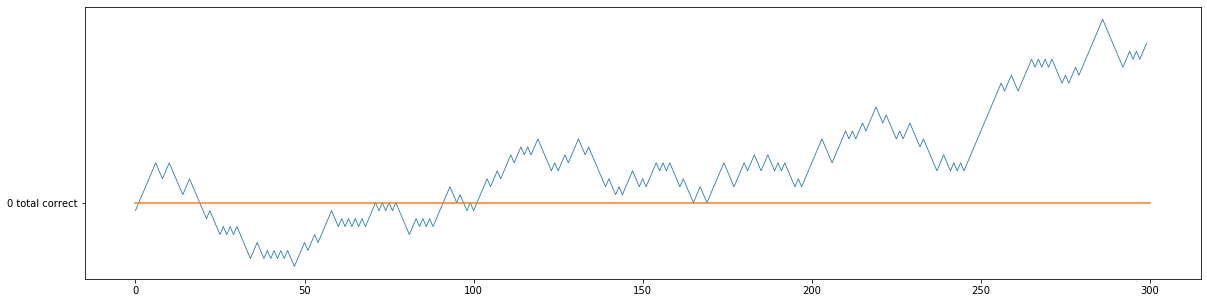

In [25]:
fig, ax = plt.subplots(figsize=(20,5))
ax.plot(np.cumsum(picks[0:300]), lw=0.8)
ax.set_yticks([0])
ax.set_yticklabels(["0 total correct"])
ax.plot((0,300),(0,0))

### Question: high bias or variance or both?

Text(0.5, 1.0, 'Fraction of trials with correct outcome')

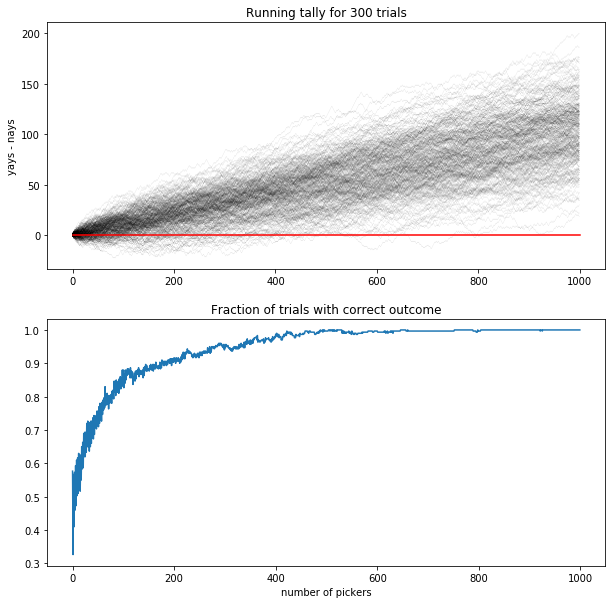

In [28]:
n_trials = 300
n_pickers = 1000

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10,10))
totals = []
tallies = []
for i in range(n_trials):
    revote = scs.bernoulli(p=0.55).rvs(n_pickers)*2 - 1
    totals.append( votes.sum() )
    tally = revote.cumsum()
    axs[0].plot( tally, lw=0.2, c="black", alpha=0.2 )
    tallies.append(tally)
    
axs[0].plot((0,n_pickers),(0,0), c="red")
axs[0].set_ylabel("yays - nays")
axs[1].set_xlabel("number of pickers")
axs[0].set_title(f"Running tally for {n_trials} trials")

tallies = np.array(tallies)
axs[1].plot( (tallies>0).sum(axis=0)/n_trials )
axs[1].set_title("Fraction of trials with correct outcome")

Bias vs Variance illustration: https://miro.medium.com/max/1088/1*Y-yJiR0FzMgchPA-Fm5c1Q.jpeg 

# The goal of ensembling
Qualitatively: the goal of ensembling is to produce better models. This is often formalized in two ways:

## Reduce variance
Jellybean example - each estimator had low bias (ie, on average is right), but high variance, which we could reduce by averaging.  
Jumping ahead - random forests.
## Reduce bias
Stock picking example - each stock picker could have high bias (ie, is repeatably wrong), but the ensemble has low bias (is repeatably correct across resampled training sets).  
Jumping ahead - boosted trees.

### If only we had a way to easily generate multiple models for ensembling...

# Bootstrapping summary

- Take a data set of size n
- Sample with replacement to create a bootstrap sample of size n 
- Repeat desired number of times 
- Each bootstrap sample can now be used as a separate dataset for modeling 

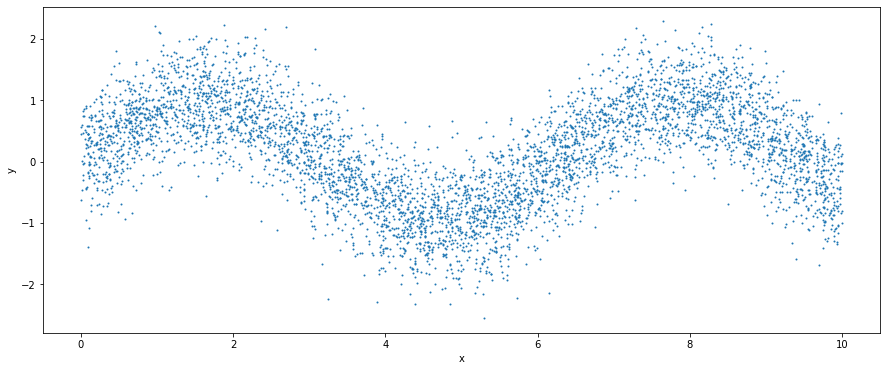

In [31]:
n_data = 5000
x = scs.uniform(0, 10).rvs(n_data)
y = np.sin(x) + scs.norm(0, 0.5).rvs(n_data)
fig, ax = plt.subplots(figsize=(15,6))
ax.plot(x, y, '.', ms=2)
ax.set_xlabel('x')
ax.set_ylabel('y');


In [32]:
from sklearn.tree import DecisionTreeRegressor

max_depth = 10
model0 = DecisionTreeRegressor(max_depth=max_depth)
model0.fit(x.reshape(-1, 1), y)

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

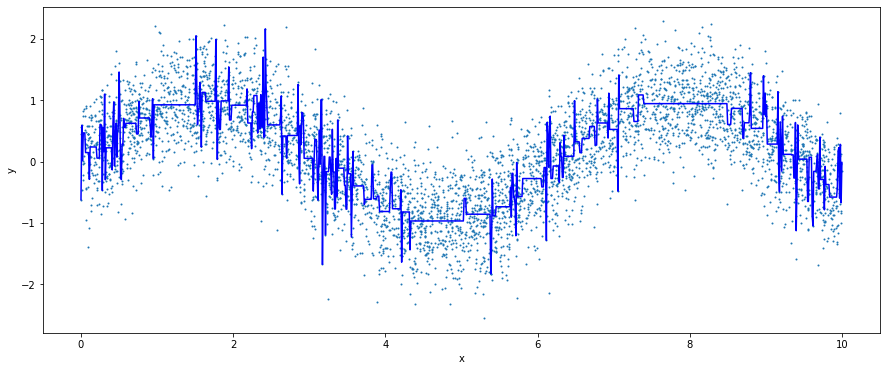

In [33]:
n_pts = 1000
xpts = np.linspace(0, 10, n_pts)

fig, ax = plt.subplots(figsize=(15,6))
ax.plot(x, y, '.', ms=2)

ax.plot(xpts, model0.predict(xpts.reshape(-1, 1)), 'b')
ax.set_xlabel('x')
ax.set_ylabel('y');

In [34]:
n_bootstraps = 5000
yptses = np.zeros((n_bootstraps, n_pts))
for i in range(n_bootstraps):
    bootstrap_ind = np.random.choice(np.arange(n_data), n_data, replace=True)
    model = DecisionTreeRegressor(max_depth=max_depth)
    model.fit(x[bootstrap_ind].reshape(-1, 1), y[bootstrap_ind])
    yptses[i] = model.predict(xpts.reshape(-1, 1))

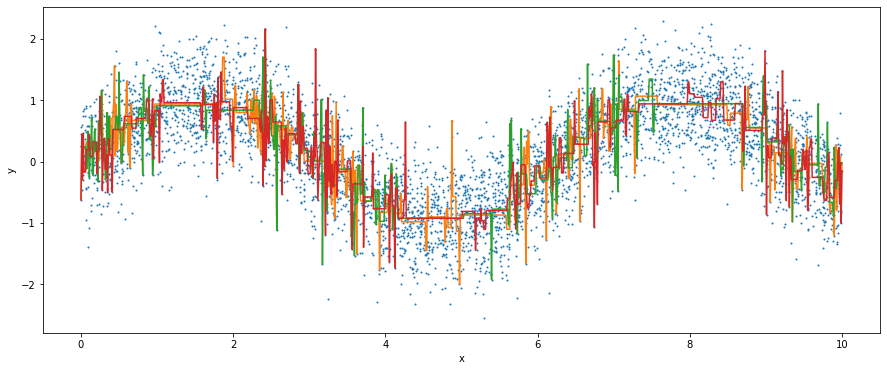

In [35]:
fig, ax = plt.subplots(figsize=(15,6))
ax.plot(x, y, '.', ms=2)

for i in range(3):
    ax.plot(xpts, yptses[i])
    
ax.set_xlabel('x')
ax.set_ylabel('y');

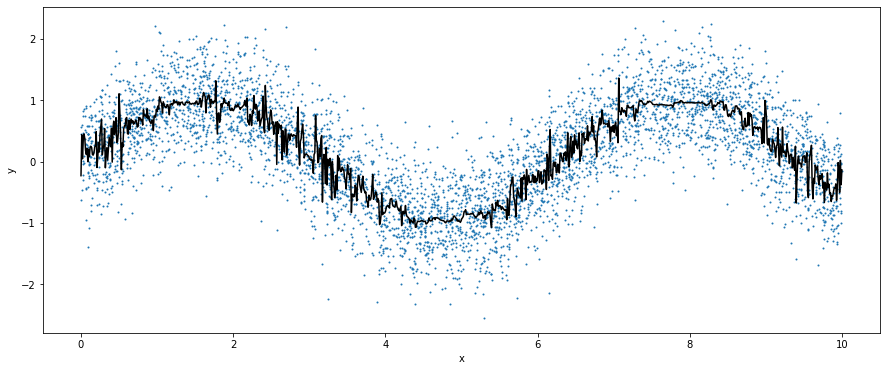

In [36]:
fig, ax = plt.subplots(figsize=(15,6))
ax.plot(x, y, '.', ms=2)

ax.plot(xpts, yptses.mean(axis=0), 'k')
ax.set_xlabel('x')
ax.set_ylabel('y');

## What can we improve about this?
Predicting dog size from age and color example.

## Random Forests

Bagging disadvantage: trees are similar. 

We need a way to decorrelate them without increasing bias too much... 

Random forests do this with feature subsetting (also called "subspace sampling"). For any node in any tree, instead of finding the best split among all features, we randomly select a few features, and find the best split among just those features. The number of features $m$ to consider at each split is a hyperparameter; often $m = \sqrt k$ is used.

If we build a tree in a random forest, that first split will only consider three (random) features. Only a fraction of the trees (around 30%) will consider the "good" feature on the first split, so they will use that. Some of the others will consider the "pretty-good" feature, so they will start there. The others will start at some other feature. Those trees will still consider the good and pretty-good features at some of the lower nodes (randomly), and will get to take advantage of them, but the overall structure of those trees will be very different.

## Random Forest Parameters

- Total number of trees
- Number of features to use at each split
- Individual decision tree Parameters
    - e.g., tree depth, pruning, split criterion
- In general, RF are fairly robust to the choice of parameters and overfitting.

## Pros and Cons of Random Forest
### Pros

- Often give near state-of-the-art performance
- Good out-of-the-box performance
- No feature scaling needed
- Model nonlinear relationships

### Cons

- Can be expensive to train (though can be done in parallel)
- Requires some work to interpret the effect of a single feature / feature interaction on the target

?out of the bag error on not?